In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import copy

In [25]:
# Read the cattus image as the gray image
# Source: https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/
input_cattus_img = cv2.imread("cattus.png",0)

In [26]:
# using numpy is because cv variable is ndarray
print(type(input_cattus_img))
# check the size of the input image
row = input_cattus_img.shape[0]
col = input_cattus_img.shape[1]
print(row)
print(col)

<class 'numpy.ndarray'>
1202
1803


28
0


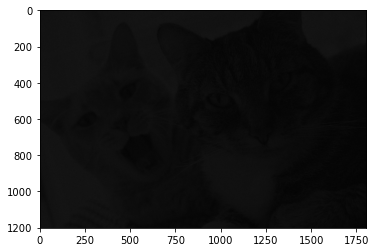

In [27]:
# print the image as the gray image
# Doing the Contrast Stretching which vmin=0 vmax=255
# Documents Sourse: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.imshow(input_cattus_img,'gray',vmin=0,vmax=255)
print(np.max(input_cattus_img))
print(np.min(input_cattus_img))

[[154 163 209 ... 136 136 163]
 [182 191 173 ... 154 136 145]
 [154 154 163 ... 145 118 163]
 ...
 [136 145 127 ...  54  54  36]
 [200 209 173 ...  27  72  54]
 [209 191 136 ...  36  36  27]]
255
0
uint8


True

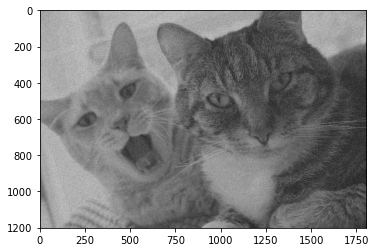

In [112]:
# Tr function in the lab pdf
# Tr = (Or - c)*((b - a)/(d-c)) + a
# Source: https://webcms3.cse.unsw.edu.au/COMP9517/21T1/resources/57381
a = 0
b = 255
c = np.min(input_cattus_img)
d = np.max(input_cattus_img)
# Creating a new matrix to store the data of the transformed image
contrast_transformed_cattus_img = np.zeros_like(input_cattus_img)

# Using the for loop to initialize this part
# go through each point in the matrix and doing the operation
# for i in range(row):
#     for j in range(col):
#         contrast_transformed_cattus_img[i,j] = (input_cattus_img[i,j]-c) * ((b-a)/(d-c)) + a

# contrast_transformed_cattus_img = ((input_cattus_img - c) * ((b-a)/(d-c)) + a).astype(np.uint8)

# can also use the dot function provided by numpy
contrast_transformed_cattus_img = ((np.dot(input_cattus_img - c,(b - a)/(d - c))) + a).astype(np.uint8)

# This part is to check the data dtype max and min of the output
print(contrast_transformed_cattus_img)
print(np.max(contrast_transformed_cattus_img))
print(np.min(contrast_transformed_cattus_img))
print(contrast_transformed_cattus_img.dtype)

plt.imshow(contrast_transformed_cattus_img,'gray',vmin=0,vmax=255)
cv2.imwrite('Output_q1.jpg', contrast_transformed_cattus_img)

In [29]:
# Conclusion Of Q1:
# Before doing the operation we should check contrast of the gray image
# If the current image is high contrast image which means vmin = 0 vmax = 255
# , we should do the following operation. If not, using the formula to 
# do the contrast stretching.

<BarContainer object of 256 artists>

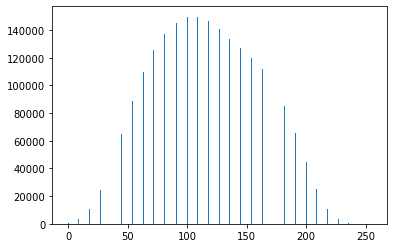

In [113]:
# Question 2.1: Draw histogram for gray level image
# This histogram is just counting points with diff gray level
gray_level_matrix = [0 for x in range(0,256)]

for r in range(row):
    for c in range(col):
        gray_level_matrix[contrast_transformed_cattus_img[r,c]] += 1

plt.bar(x=range(0,256),height=gray_level_matrix)


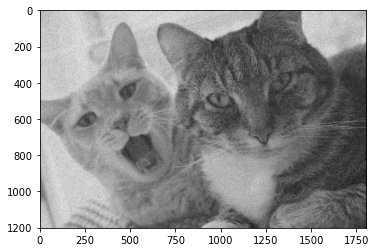

In [232]:
median_img_cat = cv2.medianBlur(contrast_transformed_cattus_img,3)
plt.imshow(median_img_cat,'gray')

<BarContainer object of 256 artists>

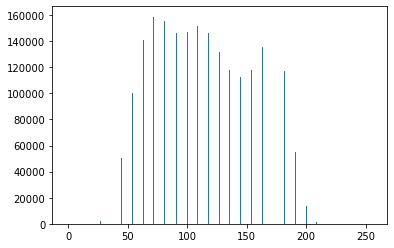

In [233]:
gray_level_matrix_q3 = [0 for x in range(0,256)]

for r in range(row):
    for c in range(col):
        gray_level_matrix_q3[median_img_cat[r,c]] += 1

plt.bar(x=range(0,256),height=gray_level_matrix_q3)

In [259]:
# Q4 test
kernal_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernal_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

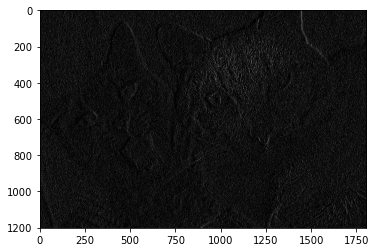

In [260]:
filter_x = cv2.filter2D(median_img_cat, -1 , kernal_x)
plt.imshow(filter_x,'gray')

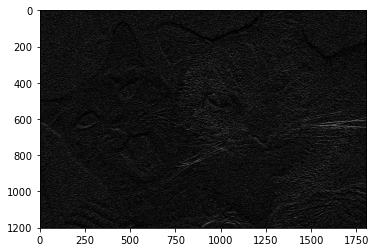

In [261]:
filter_y = cv2.filter2D(median_img_cat, -1 , kernal_y)
plt.imshow(filter_y,'gray')

[[  0  29  10 ...   0  18   0]
 [  0  29  15 ...  18  27   9]
 [  0  19  20 ...  32   9   0]
 ...
 [ 83  51  18 ...  36   0   0]
 [101  69  19 ...  23   0   0]
 [  0   0   0 ...   9   0   0]]


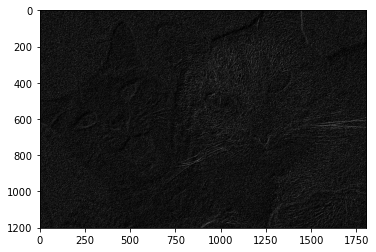

In [262]:
new_img = cv2.addWeighted(filter_x,0.5,filter_y,0.5,0)
plt.imshow(new_img,'gray')
print(new_img)

[[  0  29  10 ...   0  18   0]
 [ 19  48  30 ...  18  27   9]
 [  9  37  48 ...  46   9   0]
 ...
 [ 83  56  18 ...  72  36  27]
 [101 138  38 ...  45  36  36]
 [  0 101  38 ...   9   0   0]]


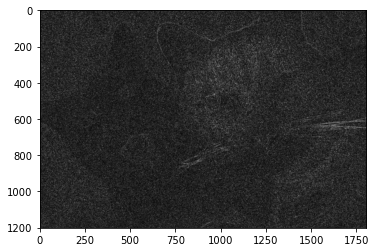

In [257]:

x = cv2.Sobel(median_img_cat,cv2.CV_16S,1 , 0, ksize = 3)

y = cv2.Sobel(median_img_cat,cv2.CV_16S,0 , 1, ksize = 3)

absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

dst_img = cv2.addWeighted(absX,0.5,absY,0.5,0)

plt.imshow(dst_img,"gray")
print(dst_img)